In [1]:
#Importing all the needed packages and subpackages. 
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 14 09:19:54 2022

@author: vivianliu
adopted for jupyter notebook by Alexa Halford
"""
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import copy

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [2]:
# Here we are putting in the information that needs to be hardcoded into 
# the jupyter notbook runs. 

#   data: a data frame or string pathname type
data = "../../../Data/combined_data_all_reduced_omni.csv"

#   target_variable: string with target variable name
target_variable = '400kmDensity'

#Below is our "Standard model" for what we want to compare to. 
#   features (optional): takes a list type with the names of all the 
#                        variables to include. Default is all
Stand_features = ["DAILY_F10.7_", "MagTime","SLat", "3-H_KP*10_"] #"DipLat", 
                  #"SYM/H_INDEX_nT"]#, "1-M_AE_nT", "3-H_KP*10_"]
SV1_features = ["DAILY_SUNSPOT_NO_", "MagTime","SLat", "3-H_KP*10_"] 
SV2_features = ["irradiance (W/m^2/nm)", "MagTime","SLat", "3-H_KP*10_"] 
SV3_features = ["SOLAR_LYMAN-ALPHA_W/m^2", "MagTime","SLat", "3-H_KP*10_"] 
SV4_features = ["mg_index (core to wing ratio (unitless))", "MagTime","SLat", "3-H_KP*10_"] 

GV1_features = ["DAILY_F10.7_", "MagTime","SLat", "3-H_AP_nT"]
GV2_features = ["DAILY_F10.7_", "MagTime","SLat", "1-M_AE_nT"] 
GV3_features = ["DAILY_F10.7_", "MagTime","SLat", "SYM/H_INDEX_nT"]
#need to create the slope of Sym-H
#GV4_features = ["DAILY_F10.7_", "MagTime","SLat", "SYM/H_INDEX_nT", "Slope_Sym_H"]

#need to add in variations of sort of latitude, magnetic lat, geographic lat, solar zenith angle, etc

#There are some features we want for plotting - like date - 
#but don't want for creating the model so we identify those here. 
drop_features = ["year", "hour", "minute", "second"] #None


#   estimators (optional): integer for number of estimators in 
#                       random forest. Default is 150
estimators = 150


#   TrainUpTo (optional): A 4 digit year input that allows users to 
#                       select training data before inputted year
TrainUpTo = 2008 #None


#   rdm_state (optional): integer for random state of random 
#                        forest regression. Defult is 16
rdm_state = 16


#   test_portion (optional): float between 0 and 1 for 
#                         proportion of data used for test. 
#                         Default is 0.25
test_portion = 0.25


#   plot: boolean input indicating whether or not to plot the 
#                        prediction and true data. Default is False
plot = True #False

In [3]:
#Further preparing the data 

#Create a dataframe based on data input method
if (type(data) == pd.core.frame.DataFrame):
    merged_df = data;
elif (type(data) == str):
    merged_df = pd.read_csv(data)
    
#Sort by data for easier reading
merged_df = merged_df.sort_values(by = "Datetime")
merged_df = merged_df.reset_index(drop = True)
    
#Get rid of any rows outside of expected date range
#This needed to be done as there were some bad date and data
merged_df = merged_df[~(merged_df["Datetime"] < '2002-05-01')]

#Remove datetime column for random forest
merged_df = merged_df.drop("Datetime", axis = 1)

#Set target and feature variables
target = merged_df[target_variable]
target = target*(10**12)
merged_df = merged_df.drop(target_variable, axis = 1)
SV1merged_df = copy.deepcopy(merged_df)

In [4]:
#Here we are starting to build up the different models by making 
#sure they have the right inputs/outputs. 
#Adjust features being used based on user input

#First we start with the 'standard' model
#Stand_list = list(merged_df.columns)
STmodel_features = ["year", "month", "day", "hour", "minute", "second"]
for element in Stand_features:
    STmodel_features.append(element)
Stand_list = STmodel_features
merged_df = merged_df[Stand_list]



##Now we move onto the solar index variations 
SV1model_features = ["year", "month", "day", "hour", "minute", "second"]
for element in SV1_features:
    SV1model_features.append(element)
SV1_list = SV1model_features
SV1merged_df = SV1merged_df[SV1_list]

#SV2model_features = ["year", "month", "day", "hour", "minute", "second"]
#for element in SV2_features:
#    SV2model_features.append(element)
#SV2_list = SV2model_features
#SV2merged_df = merged_df[SV2_list]

#SV3model_features = ["year", "month", "day", "hour", "minute", "second"]
#for element in SV3_features:
#    SV1model_features.append(element)
#SV3_list = SV3model_features
#SV3merged_df = merged_df[SV3_list]

#SV4model_features = ["year", "month", "day", "hour", "minute", "second"]
#for element in SV4_features:
#    SV1model_features.append(element)
#SV4_list = SV4model_features
#SV4merged_df = merged_df[SV4_list]

#Now on to the geomagnetic index variations 
#GV1model_features = ["year", "month", "day", "hour", "minute", "second"]
#for element in GV1_features:
#    GV1model_features.append(element)
#GV1_list = GV1model_features
#GV1merged_df = merged_df[GV1_list]

#GV2model_features = ["year", "month", "day", "hour", "minute", "second"]
#for element in GV2_features:
#    GV2model_features.append(element)
#GV2_list = GV2model_features
#GV2merged_df = merged_df[GV2_list]

#GV3model_features = ["year", "month", "day", "hour", "minute", "second"]
#for element in GV3_features:
#    GV1model_features.append(element)
#GV3_list = GV3model_features
#GV3merged_df = merged_df[Gaw3wV3_list]

In [5]:
###Set training and testing groups###
    
#If no testing set specified, create random testing and training groups
if (TrainUpTo == None):
    train_features, test_features, train_target, test_target = train_test_split(merged_df, target, test_size = test_portion, random_state = rdm_state)
else:
    #Choose training and testing data
    train_features = merged_df[merged_df.year <= TrainUpTo]
    size = len(train_features.index)
    test_features = merged_df.iloc[size:]
    train_target = target.iloc[0:size]
    test_target = target.iloc[size:]
    
#now for the variations 
if (TrainUpTo == None):
    SV1train_features, SV1test_features, SV1train_target, SV1test_target = SV1train_test_split(SV1merged_df, target, test_size = test_portion, random_state = rdm_state)
else:
    #Choose training and testing data
    SV1train_features = SV1merged_df[SV1merged_df.year <= TrainUpTo]
    size = len(train_features.index)
    SV1test_features = merged_df.iloc[size:]
    SV1train_target = target.iloc[0:size]
    SV1test_target = target.iloc[size:]
    

In [6]:
#Create new variables to hold current dataframe which has datetime values in case they are dropped
#Used for graphing predicted and true values based on date
graph_df = merged_df
Stand_list_u = Stand_list.copy()
test_features_u = test_features

#Now for the variations 
SV1graph_df = SV1merged_df
SV1_list_u = SV1_list.copy()
SV1test_features_u = SV1test_features

In [7]:
#Drop features that user specifies so that they aren't included in the random forest
if (drop_features != None):
    train_features = train_features.drop(drop_features, axis = 1)
    test_features = test_features.drop(drop_features, axis = 1)   
    for element in drop_features:
        Stand_list.remove(element)
        
#Now for the variations
if (drop_features != None):
    SV1train_features = SV1train_features.drop(drop_features, axis = 1)
    SV1test_features = SV1test_features.drop(drop_features, axis = 1)   
    for element in drop_features:
        SV1_list.remove(element)

In [8]:
#Train and fit the model
rf = RandomForestRegressor(n_estimators = estimators, random_state = rdm_state)
rf.fit(train_features, train_target)

#now for the variations
SV1rf = RandomForestRegressor(n_estimators = estimators, random_state = rdm_state)
SV1rf.fit(SV1train_features, train_target)

RandomForestRegressor(n_estimators=150, random_state=16)

In [9]:
#Make predictions and calculate error
predictions = rf.predict(test_features)

#Print the mean absolute error
mean_abs_error = mean_absolute_error(test_target, predictions)
print("\nMean Absolute Error: ", mean_abs_error, " kg/m^3.")

#Print mean absolute percentage error
mape = mean_absolute_percentage_error(test_target, predictions)
print("Mean Absolute Percentage Error: ", mape)

#Now for the variations
#Make predictions and calculate error
SV1predictions = SV1rf.predict(SV1test_features)

#Print the mean absolute error
SV1mean_abs_error = mean_absolute_error(test_target, SV1predictions)
print("\n for SV1 Mean Absolute Error: ", SV1mean_abs_error, " kg/m^3.")

#Print mean absolute percentage error
SV1mape = mean_absolute_percentage_error(test_target, SV1predictions)
print("For SV1 Mean Absolute Percentage Error: ", SV1mape)


Mean Absolute Error:  0.42153405692359686  kg/m^3.
Mean Absolute Percentage Error:  0.48035833029178693


/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DAILY_F10.7_
Feature names seen at fit time, yet now missing:
- DAILY_SUNSPOT_NO_

  warnings.warn(message, FutureWarning)



 for SV1 Mean Absolute Error:  1.210825083151235  kg/m^3.
For SV1 Mean Absolute Percentage Error:  2.2226631761476496


In [11]:
#Print r-squared score of model
score = r2_score(test_target, predictions)
#print("Score: ", score)

#Examine feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(Stand_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

print('For the standard model')
print("Score: ", score)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

#Now for the variations 
#Print r-squared score of model
SV1score = r2_score(test_target, SV1predictions)
#print("Score: ", SV1score)

#Examine feature importances
SV1importances = list(SV1rf.feature_importances_)
SV1feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(SV1_list, importances)]
SV1feature_importances = sorted(SV1feature_importances, key = lambda x: x[1], reverse = True)

print('For the solar variation 1 Daily Sunspot number')
print("Score: ", SV1score)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in SV1feature_importances]


For the standard model
Score:  0.7032938829739246
Variable: DAILY_F10.7_         Importance: 0.65
Variable: MagTime              Importance: 0.11
Variable: month                Importance: 0.1
Variable: SLat                 Importance: 0.05
Variable: 3-H_KP*10_           Importance: 0.05
Variable: day                  Importance: 0.03
For the solar variation 1 Daily Sunspot number
Score:  -0.43696327222283604
Variable: DAILY_SUNSPOT_NO_    Importance: 0.65
Variable: MagTime              Importance: 0.11
Variable: month                Importance: 0.1
Variable: SLat                 Importance: 0.05
Variable: 3-H_KP*10_           Importance: 0.05
Variable: day                  Importance: 0.03


[None, None, None, None, None, None]

/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/alexahalford/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for 

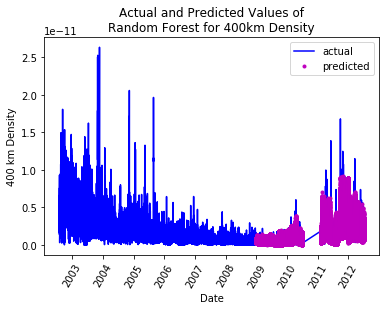

In [11]:
if (plot == True):
    #Create arrays for the datetime values for the true data
    months = graph_df.iloc[:, Stand_list_u.index('month')]
    days = graph_df.iloc[:, Stand_list_u.index('day')]
    years = graph_df.iloc[:, Stand_list_u.index('year')]
    hours = graph_df.iloc[:, Stand_list_u.index('hour')]
    minutes = graph_df.iloc[:, Stand_list_u.index('minute')]
    seconds = graph_df.iloc[:, Stand_list_u.index('second')]
    
    #Convert datetime arrays to datetime type
    dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) + " " + str(int(hour)) + ":" + str(int(minute)) + ":" + str(int(second)) for year, month, day, hour, minute, second in zip(years, months, days, hours, minutes, seconds)]
    dates = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in dates]
    
    #Create dataframe using datetime and target data
    true_data = pd.DataFrame(data = {'date': dates, 'actual': target})
    true_data = true_data.sort_values(by = "date")
    true_data["actual"] = true_data["actual"] / (10**12)
    
    #Create arrays for the datetime values for the predicted data
    months = test_features_u.iloc[:, Stand_list_u.index('month')]
    days = test_features_u.iloc[:, Stand_list_u.index('day')]
    years = test_features_u.iloc[:, Stand_list_u.index('year')]
    hours = test_features_u.iloc[:, Stand_list_u.index('hour')]
    minutes = test_features_u.iloc[:, Stand_list_u.index('minute')]
    seconds = test_features_u.iloc[:, Stand_list_u.index('second')]
    
    #Convert datetime arrays to datetime type
    test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) + " " + str(int(hour)) + ":" + str(int(minute)) + ":" + str(int(second)) for year, month, day, hour, minute, second in zip(years, months, days, hours, minutes, seconds)]
    test_dates = [dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in test_dates]
    
    #Make a new dataframe with prediction data
    prediction_data = pd.DataFrame(data = {"dates": test_dates, "predictions": predictions})
    prediction_data = prediction_data.sort_values(by = "dates")
    prediction_data["predictions"] = prediction_data["predictions"] / (10**12)
    
    #Plot the true values in blue
    plt.plot(true_data["date"], true_data["actual"], "b-", label = "actual")
    #Plot predicted values in magenta
    plt.plot(prediction_data["dates"], prediction_data["predictions"], "mo", label = "predicted", markersize = 3)
    
    
    #Label Plot
    plt.xticks(rotation = 60)
    plt.xlabel("Date")
    plt.ylabel("400 km Density")
    plt.title("Actual and Predicted Values of\nRandom Forest for 400km Density")
    plt.legend()